In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Transform the unit balls define by the given p-norm.
def plot_unit_ball_transform(A, n, p):
    # Define x-coordiantes.
    x = np.linspace(-1, 1, n)

    # L1 Norm.
    if p == 1: 
        y_1 = 1 - np.abs(x)
        y_2 = -y_1
        x = np.concatenate([x, x.copy()])
        y = np.concatenate([y_1, y_2])
        coords = np.column_stack([x, y])
        transformed_coords = coords @ A
    # L2 Norm.
    elif p == 2:
        y_1 = np.sqrt(1 - x ** 2)
        y_2 = -y_1
        x = np.concatenate([x, x.copy()])
        y = np.concatenate([y_1, y_2])
        coords = np.column_stack([x, y])
        transformed_coords = coords @ A
    # L-Inf norm.
    elif p == 'inf':
        # Get square (x).
        x_1 = x.copy()
        x_2 = x_1.copy()
        x_3 = np.ones(len(x_1))
        x_4 = -x_3
        x = np.concatenate([x_1, x_2, x_3, x_4])

        # Get square (y).
        y_1 = x_3.copy()
        y_2 = -x_3
        y_3 = x_1.copy()
        y_4 = x_2.copy()
        y = np.concatenate([y_1, y_2, y_3, y_4])
       
        coords = np.column_stack([x, y])
        transformed_coords = coords @ A
    
    # Get transformed coordinates for plotting.
    xf, yf = transformed_coords[:, 0], transformed_coords[:, 1]

    # Plot.
    fig, ax = plt.subplots()
    plt.scatter(coords[:, 0], coords[:, 1], label=str(p) + "-Norm Unit Ball")
    plt.scatter(xf, yf, label="Ball Transformed by A")
    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

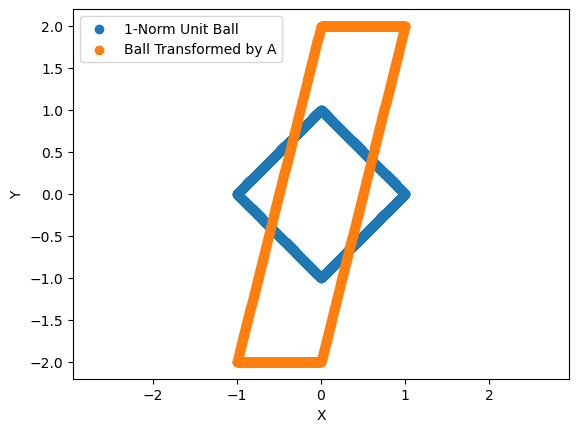

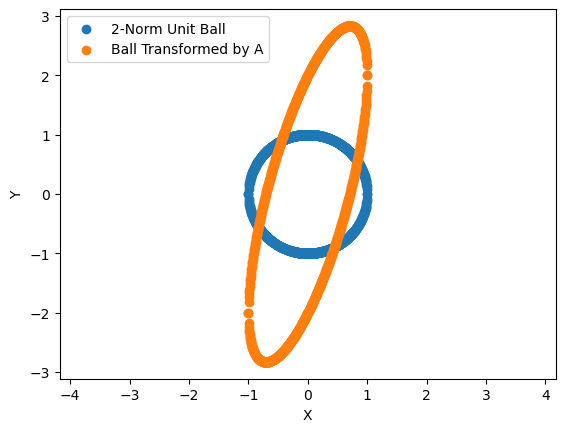

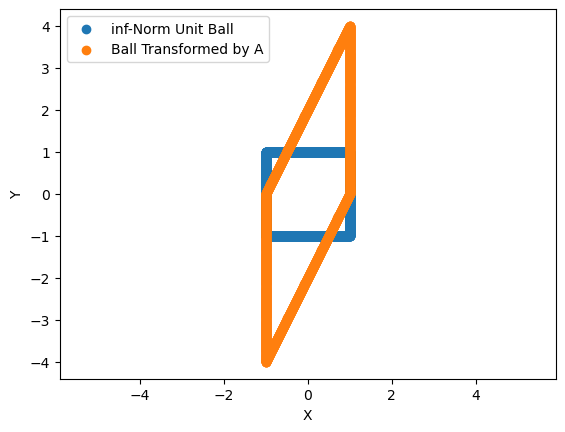

In [3]:
# Make A.
A = np.array([[1, 2], [0, 2]])
n = 500

# L1.
plot_unit_ball_transform(A, n, p=1)

# L2.
plot_unit_ball_transform(A, n, p=2)

# L-Inf.
plot_unit_ball_transform(A, n, p='inf')

In [4]:
# Problem 2. Load the data and make the plots.
results_float_kij = np.genfromtxt('float_results_kij.csv', delimiter=',')
results_double_kij = np.genfromtxt('double_results_kij.csv', delimiter=',')
results_float_jki = np.genfromtxt('float_results_jki.csv', delimiter=',')
results_double_jki = np.genfromtxt('double_results_jki.csv', delimiter=',')

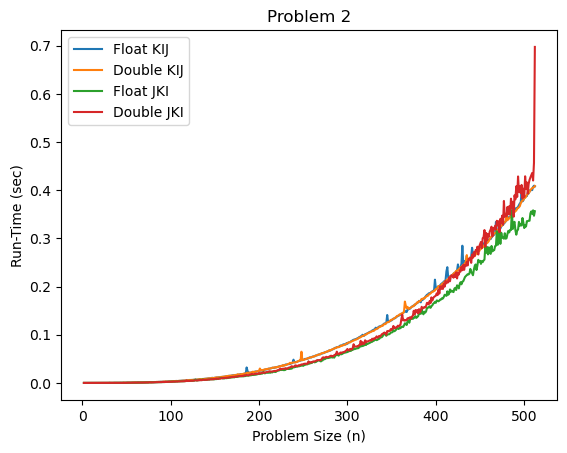

In [5]:
# Make plots.
indices = np.arange(len(results_float_kij)) + 2

fig, ax = plt.subplots()
plt.plot(indices, results_float_kij, label='Float KIJ')
plt.plot(indices, results_double_kij, label='Double KIJ')
plt.plot(indices, results_float_jki, label='Float JKI')
plt.plot(indices, results_double_jki, label='Double JKI')
plt.title("Problem 2")
plt.xlabel("Problem Size (n)")
plt.ylabel("Run-Time (sec)")
plt.legend()
plt.show()

In [2]:
# Problem 5. Load the data and make the plots.
results_read = np.genfromtxt('read_results.csv', delimiter=',')
results_write = np.genfromtxt('write_results.csv', delimiter=',')

C:\Users\natew\AppData\Local\Temp\ipykernel_152912\3523824648.py:4: RuntimeWarning: divide by zero encountered in divide
  bytes_read = 8 * (indices2 ** 2) / results_read


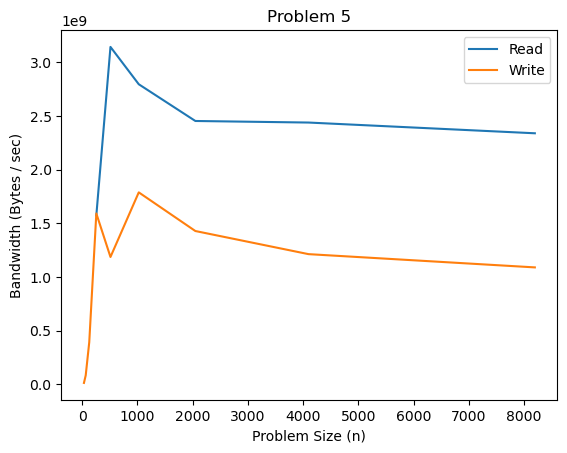

In [4]:
# Make plots.
indices2 = 2 ** (np.arange(len(results_read)) + 5)

bytes_read = 8 * (indices2 ** 2) / results_read
bytes_write = 8 * (indices2 ** 2) / results_write

fig, ax = plt.subplots()
plt.plot(indices2, bytes_read, label='Read')
plt.plot(indices2, bytes_write, label='Write')
plt.title("Problem 5")
plt.xlabel("Problem Size (n)")
plt.ylabel("Bandwidth (Bytes / sec)")
plt.legend()
plt.show()

In [8]:
# Problem 6. Load the data and make the plots.
results_row = np.genfromtxt('row_results.csv', delimiter=',')
results_col = np.genfromtxt('col_results.csv', delimiter=',')

C:\Users\natew\AppData\Local\Temp\ipykernel_75536\2213862130.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(indices3, np.log10(results_col), label='Col-Swap')


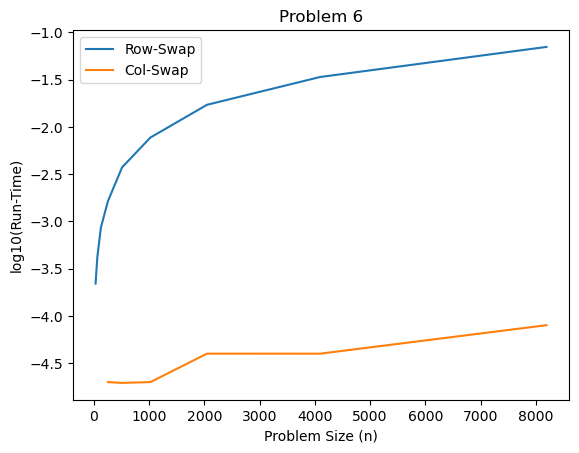

In [9]:
# Make plots.
indices3 = 2 ** (np.arange(len(results_row)) + 5)

fig, ax = plt.subplots()
plt.plot(indices3, np.log10(results_row), label='Row-Swap')
plt.plot(indices3, np.log10(results_col), label='Col-Swap')
plt.title("Problem 6")
plt.xlabel("Problem Size (n)")
plt.ylabel("log10(Run-Time)")
plt.legend()
plt.show()